# Sentiment Analysis for Marketing: Understanding Customer Preferences through Data

                        

#                          Phase 4: development part 2


                                                                 

# Done by: 
           
           

# G. Vineeth Kumar
           

# 311421104109
           

# Meenakshi College of Engineering - 3114
           

# B.E CSE 3rd yr. 5th SEM

# Description:

In this technology we will continue building our project by selecting a machine learning algorithm, training the model, and evaluating its performance. Perform different analysis as needed

# BERT Model and Tokenizer Setup

In [3]:
# Import the necessary libraries for BERT model and tokenizer
from transformers import BertModel, BertTokenizer

# Define the pre-trained BERT model's name
model_name = "bert-base-uncased"

# Load the BERT model with the specified name
model = BertModel.from_pretrained(model_name)

# Load the BERT tokenizer corresponding to the model
tokenizer = BertTokenizer.from_pretrained(model_name)


In [5]:
dataset

,Tweet ID,Airline Sentiment,Sentiment Confidence,Negative Reason,Negative Reason Confidence,Airline,Airline Sentiment Gold,Name,Negative Reason Gold,Text,Tweet Created,Tweet Location,User Timezone,tokenized_text
0,570066283233972224,positive,0.9657,NaN,0.0000,Southwest,positive,magmum03,NaN,southwestair awesome flight dallas 2 ny virgin...,2015-02-23 19:42:47,NaN,NaN,"['southwestair', 'what', 'an', 'awesome', 'fli..."
1,568561924985782272,positive,1.0000,NaN,NaN,US Airways,positive,christinachime,NaN,usairways thank finally got bag customer servi...,2015-02-19 16:05:00,NaN,NaN,"['usairways', 'thank', 'you', 'finally', 'got'..."
2,570264948548313088,positive,1.0000,NaN,NaN,American,positive,Runts54,NaN,americanair dfwairport 2 together best part fl...,2015-02-24 08:52:13,"Euless, Texas",NaN,"['americanair', 'dfwairport', 'you', '2', 'tog..."
3,569600137296633920,positive,0.9236,NaN,0.0000,American,positive,douglaskgordon,NaN,americanair thank youyou,2015-02-22 12:50:30,"Caribbean, New York and Miami.",Indiana (East),"['americanair', 'thank', 'youyou', 'do', 'the'..."
4,568551906634797120,positive,0.6242,NaN,0.0000,American,positive,byunsamuel,NaN,americanair hopefully see bad ones opportunity...,2015-02-19 15:25:12,"Sunnyside, NY",Eastern Time (US & Canada),"['americanair', 'hopefully', 'you', 'll', 'see..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599,569587686496825280,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,americanair thank got different flight chicago,2015-02-22 12:01:01,NaN,NaN,"['americanair', 'thank', 'you', 'we', 'got', '..."
14600,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,americanair leaving 20 minutes late flight war...,2015-02-22 11:59:46,Texas,NaN,"['americanair', 'leaving', 'over', '20', 'minu..."
14601,569587242672398272,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,americanair please bring american airlines bla...,2015-02-22 11:59:15,"Nigeria,lagos",NaN,"['americanair', 'please', 'bring', 'american',..."
14602,569587188687634432,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,americanair money change flight dont answer ph...,2015-02-22 11:59:02,New Jersey,Eastern Time (US & Canada),"['americanair', 'you', 'have', 'my', 'money', ..."


# Creating BERT Embeddings for Text Data using PyTorch

In [8]:
# Import the necessary library
import torch

# Define a function to get BERT embeddings for input text
def get_bert_embeddings(text):
    # Convert the input text to a PyTorch tensor and add a batch dimension
    input_ids = torch.tensor(text).unsqueeze(0)
    
    # Perform inference with the BERT model (assuming 'model' is previously defined)
    with torch.no_grad():
        outputs = model(input_ids)
        # Calculate the mean of the last hidden state to obtain embeddings
        embeddings = outputs.last_hidden_state.mean(dim=1)
    
    return embeddings

dataset['bert_embeddings'] = dataset['tokenized_text'].apply(get_bert_embeddings)


# Topic Modeling with Latent Dirichlet Allocation (LDA) for Text Data

In [14]:
# Import necessary libraries
from gensim import corpora, models

# Load the dataset from an Excel file
dataset = pd.read_excel("output_data_updated_with_sentiment.xlsx")

# Tokenize the text if not already tokenized
dataset['tokenized_text'] = dataset['tokenized_text'].apply(lambda x: x.split())  # Split text into a list of tokens

# Create a dictionary of words from the tokenized text
dictionary = corpora.Dictionary(dataset['tokenized_text'])

# Convert the dictionary to a bag-of-words representation
corpus = [dictionary.doc2bow(text) for text in dataset['tokenized_text']]

# Perform LDA (Latent Dirichlet Allocation) topic modeling with 5 topics and 15 passes
lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Assign topics to each review in the dataset
dataset['topic'] = [lda[corpus[i]] for i in range(len(dataset))]



# Text Data Topic Modeling using Latent Dirichlet Allocation (LDA) and Gensim

In [18]:

from gensim import corpora, models

# Load the dataset
dataset = pd.read_excel("output_data_updated_with_sentiment.xlsx")

# Tokenize the text if it's not already tokenized (you might skip this if it's already done)
# Create a dictionary of words
dataset['tokenized_text'] = dataset['tokenized_text'].apply(lambda x: x.split())  # Split the string into a list of tokens

dictionary = corpora.Dictionary(dataset['tokenized_text'])

# Convert the dictionary to a bag-of-words representation
corpus = [dictionary.doc2bow(text) for text in dataset['tokenized_text']]

# Perform LDA topic modeling
lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Assign topics to each review
dataset['topic'] = [lda[corpus[i]] for i in range(len(dataset))]



# Setting Up NLP Tools with spaCy and PyTorch

In [22]:
import spacy
import torch

# Set the default dtype and device for PyTorch
torch.set_default_dtype(torch.float32)  # Set the default data type
torch.set_default_device("cpu")  # Set the default device (e.g., "cpu" or "cuda")

# Load the spaCy NER model
nlp = spacy.load("en_core_web_sm")



# Extracting Named Entities from Text Data using spaCy NER Model

In [24]:
dataset['entities'] = dataset['Text'].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])


In [25]:
dataset

,Tweet ID,Airline Sentiment,Sentiment Confidence,Negative Reason,Negative Reason Confidence,Airline,Airline Sentiment Gold,Name,Negative Reason Gold,Text,Tweet Created,Tweet Location,User Timezone,tokenized_text,bert_embeddings,sentiment,topic,entities
0,570066283233972224,positive,0.9657,NaN,0.0000,Southwest,positive,magmum03,NaN,southwestair awesome flight dallas 2 ny virgin...,2015-02-23 19:42:47,NaN,NaN,"['[101,', '4943,', '11215,', '12476,', '3462,'...","tensor([[ 5.6657e-02, 2.0632e-02, 2.6626e-01...","{'neg': 0.203, 'neu': 0.617, 'pos': 0.181, 'co...","[(0, 0.13657132), (1, 0.6401591), (2, 0.110866...","[(southwestair awesome, ORG), (2, CARDINAL), (..."
1,568561924985782272,positive,1.0000,NaN,NaN,US Airways,positive,christinachime,NaN,usairways thank finally got bag customer servi...,2015-02-19 16:05:00,NaN,NaN,"['[101,', '3915,', '4313,', '14035,', '4067,',...","tensor([[ 1.4389e-01, -8.2253e-03, 3.2305e-01...","{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compou...","[(0, 0.41092548), (1, 0.013585756), (2, 0.0135...",[]
2,570264948548313088,positive,1.0000,NaN,NaN,American,positive,Runts54,NaN,americanair dfwairport 2 together best part fl...,2015-02-24 08:52:13,"Euless, Texas",NaN,"['[101,', '25988,', '4313,', '1040,', '2546,',...","tensor([[-1.3857e-01, -1.6197e-01, 2.9042e-01...","{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...","[(0, 0.11536198), (1, 0.013556691), (2, 0.0135...",[]
3,569600137296633920,positive,0.9236,NaN,0.0000,American,positive,douglaskgordon,NaN,americanair thank youyou,2015-02-22 12:50:30,"Caribbean, New York and Miami.",Indiana (East),"['[101,', '25988,', '4313,', '4067,', '2017,',...","tensor([[-9.3035e-02, 2.2016e-01, 3.7216e-01...","{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp...","[(0, 0.025300583), (1, 0.025211947), (2, 0.025...",[]
4,568551906634797120,positive,0.6242,NaN,0.0000,American,positive,byunsamuel,NaN,americanair hopefully see bad ones opportunity...,2015-02-19 15:25:12,"Sunnyside, NY",Eastern Time (US & Canada),"['[101,', '25988,', '4313,', '11504,', '2156,'...","tensor([[-5.2652e-02, 1.5723e-01, 2.8512e-01...","{'neg': 0.139, 'neu': 0.239, 'pos': 0.622, 'co...","[(0, 0.011991125), (1, 0.012075231), (2, 0.648...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599,569587686496825280,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,americanair thank got different flight chicago,2015-02-22 12:01:01,NaN,NaN,"['[101,', '25988,', '4313,', '4067,', '2288,',...","tensor([[ 8.8884e-02, -2.7573e-01, 1.8394e-01...","{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...","[(0, 0.44322193), (1, 0.020745821), (2, 0.0202...","[(chicago, GPE)]"
14600,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,americanair leaving 20 minutes late flight war...,2015-02-22 11:59:46,Texas,NaN,"['[101,', '25988,', '4313,', '2975,', '2322,',...","tensor([[-9.3935e-02, -1.3353e-01, 2.3228e-01...","{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'comp...","[(0, 0.545215), (3, 0.42837554)]","[(20 minutes, TIME), (15 minutes, TIME)]"
14601,569587242672398272,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,americanair please bring american airlines bla...,2015-02-22 11:59:15,"Nigeria,lagos",NaN,"['[101,', '25988,', '4313,', '3531,', '3288,',...","tensor([[-1.0209e-01, -2.3004e-01, 2.5336e-01...","{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'comp...","[(0, 0.23062189), (1, 0.018351018), (2, 0.0183...","[(american, NORP)]"
14602,569587188687634432,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,americanair money change flight dont answer ph...,2015-02-22 11:59:02,New Jersey,Eastern Time (US & Canada),"['[101,', '25988,', '4313,', '2769,', '2689,',...","tensor([[ 1.0850e-01, -2.3711e-01, 3.0256e-01...","{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...","[(0, 0.013468066), (1, 0.30526412), (2, 0.3808...",[]


# Extracting Keywords from Text Data using NLTK and Stopwords

In [28]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Load your dataset
dataset = pd.read_excel("output_data_updated_with_NER.xlsx")

# Function to extract keywords from a text
def extract_keywords(text, num_keywords=5):
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    
    # Calculate word frequency
    freq_dist = FreqDist(words)
    
    # Get the most common words as keywords
    keywords = [word for word, freq in freq_dist.most_common(num_keywords)]
    
    return ", ".join(keywords)

# Extract keywords from each review and add them to your dataset
dataset['keywords'] = dataset['Text'].apply(lambda x: extract_keywords(x, num_keywords=5))



# Emotion Analysis from Sentiment Scores using TextBlob

In [32]:

from textblob import TextBlob

# Load your dataset
dataset = pd.read_excel("output_data_updated_with_keywords.xlsx")

# Define a function to get the emotion from sentiment
def get_emotion(text):
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity
    
    # Map sentiment score to emotions (you can adjust the thresholds)
    if sentiment_score > 0.2:
        return "joy"
    elif sentiment_score < -0.2:
        return "sadness"
    else:
        return "neutral"

# Apply the function to your dataset
dataset['emotion'] = dataset['Text'].apply(get_emotion)


# Calculating Readability Metrics for Text Data using textstat

In [36]:
import pandas as pd
from textstat import flesch_kincaid_grade, gunning_fog

# Load your dataset
dataset = pd.read_excel("output_data_updated_with_emotions.xlsx")

# Calculate readability metrics for each review
dataset['flesch_kincaid'] = dataset['Text'].apply(lambda x: flesch_kincaid_grade(x))
dataset['gunning_fog'] = dataset['Text'].apply(lambda x: gunning_fog(x))


In [37]:
dataset

,Tweet ID,Airline Sentiment,Sentiment Confidence,Negative Reason,Negative Reason Confidence,Airline,Airline Sentiment Gold,Name,Negative Reason Gold,Text,...,User Timezone,tokenized_text,bert_embeddings,sentiment,topic,entities,keywords,emotion,flesch_kincaid,gunning_fog
0,570066283233972224,positive,0.9657,NaN,0.0000,Southwest,positive,magmum03,NaN,southwestair awesome flight dallas 2 ny virgin...,...,NaN,"['[101,', '4943,', '11215,', '12476,', '3462,'...","tensor([[ 5.6657e-02, 2.0632e-02, 2.6626e-01...","{'neg': 0.203, 'neu': 0.617, 'pos': 0.181, 'co...","[(0, 0.13657132), (1, 0.6401591), (2, 0.110866...","[('southwestair awesome', 'ORG'), ('2', 'CARDI...","southwestair, awesome, flight, dallas, 2",joy,11.1,11.51
1,568561924985782272,positive,1.0000,NaN,NaN,US Airways,positive,christinachime,NaN,usairways thank finally got bag customer servi...,...,NaN,"['[101,', '3915,', '4313,', '14035,', '4067,',...","tensor([[ 1.4389e-01, -8.2253e-03, 3.2305e-01...","{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compou...","[(0, 0.41092548), (1, 0.013585756), (2, 0.0135...",[],"usairways, thank, finally, got, bag",joy,10.3,8.04
2,570264948548313088,positive,1.0000,NaN,NaN,American,positive,Runts54,NaN,americanair dfwairport 2 together best part fl...,...,NaN,"['[101,', '25988,', '4313,', '1040,', '2546,',...","tensor([[-1.3857e-01, -1.6197e-01, 2.9042e-01...","{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...","[(0, 0.11536198), (1, 0.013556691), (2, 0.0135...",[],"americanair, dfwairport, 2, together, best",joy,9.6,8.51
3,569600137296633920,positive,0.9236,NaN,0.0000,American,positive,douglaskgordon,NaN,americanair thank youyou,...,Indiana (East),"['[101,', '25988,', '4313,', '4067,', '2017,',...","tensor([[-9.3035e-02, 2.2016e-01, 3.7216e-01...","{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp...","[(0, 0.025300583), (1, 0.025211947), (2, 0.025...",[],"americanair, thank, youyou",neutral,9.2,14.53
4,568551906634797120,positive,0.6242,NaN,0.0000,American,positive,byunsamuel,NaN,americanair hopefully see bad ones opportunity...,...,Eastern Time (US & Canada),"['[101,', '25988,', '4313,', '11504,', '2156,'...","tensor([[-5.2652e-02, 1.5723e-01, 2.8512e-01...","{'neg': 0.139, 'neu': 0.239, 'pos': 0.622, 'co...","[(0, 0.011991125), (1, 0.012075231), (2, 0.648...",[],"ones, americanair, hopefully, see, bad",neutral,11.9,17.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599,569587686496825280,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,americanair thank got different flight chicago,...,NaN,"['[101,', '25988,', '4313,', '4067,', '2288,',...","tensor([[ 8.8884e-02, -2.7573e-01, 1.8394e-01...","{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...","[(0, 0.44322193), (1, 0.020745821), (2, 0.0202...","[('chicago', 'GPE')]","americanair, thank, got, different, flight",neutral,8.0,9.07
14600,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,americanair leaving 20 minutes late flight war...,...,NaN,"['[101,', '25988,', '4313,', '2975,', '2322,',...","tensor([[-9.3935e-02, -1.3353e-01, 2.3228e-01...","{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'comp...","[(0, 0.545215), (3, 0.42837554)]","[('20 minutes', 'TIME'), ('15 minutes', 'TIME')]","minutes, late, flight, americanair, leaving",sadness,11.1,11.51
14601,569587242672398272,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,americanair please bring american airlines bla...,...,NaN,"['[101,', '25988,', '4313,', '3531,', '3288,',...","tensor([[-1.0209e-01, -2.3004e-01, 2.5336e-01...","{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'comp...","[(0, 0.23062189), (1, 0.018351018), (2, 0.0183...","[('american', 'NORP')]","americanair, please, bring, american, airlines",neutral,12.7,15.73
14602,569587188687634432,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,americanair money change flight dont answer ph...,...,Eastern Time (US & Canada),"['[101,', '25988,', '4313,', '2769,', '2689,',...","tensor(

# Text Clustering using K-Means with TF-IDF Vectorization

In [40]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your dataset
dataset = pd.read_excel("output_data_updated_with_textstat.xlsx")

# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['Text'])  # Use the 'Text' column for clustering

# Apply K-Means clustering with explicit n_init
kmeans = KMeans(n_clusters=5, n_init=10)  # You can adjust the number of clusters as needed
dataset['cluster'] = kmeans.fit_predict(tfidf_matrix)



# Text Summarization using Summa's Summarizer

In [44]:
import pandas as pd
from summa import summarizer


# Generate summaries for each review
dataset['summary'] = dataset['Text'].apply(lambda x: summarizer.summarize(x))


In [45]:
dataset

,Tweet ID,Airline Sentiment,Sentiment Confidence,Negative Reason,Negative Reason Confidence,Airline,Airline Sentiment Gold,Name,Negative Reason Gold,Text,...,bert_embeddings,sentiment,topic,entities,keywords,emotion,flesch_kincaid,gunning_fog,cluster,summary
0,570066283233972224,positive,0.9657,NaN,0.0000,Southwest,positive,magmum03,NaN,southwestair awesome flight dallas 2 ny virgin...,...,"tensor([[ 5.6657e-02, 2.0632e-02, 2.6626e-01...","{'neg': 0.203, 'neu': 0.617, 'pos': 0.181, 'co...","[(0, 0.13657132), (1, 0.6401591), (2, 0.110866...","[('southwestair awesome', 'ORG'), ('2', 'CARDI...","southwestair, awesome, flight, dallas, 2",joy,11.1,11.51,4,
1,568561924985782272,positive,1.0000,NaN,NaN,US Airways,positive,christinachime,NaN,usairways thank finally got bag customer servi...,...,"tensor([[ 1.4389e-01, -8.2253e-03, 3.2305e-01...","{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compou...","[(0, 0.41092548), (1, 0.013585756), (2, 0.0135...",[],"usairways, thank, finally, got, bag",joy,10.3,8.04,2,
2,570264948548313088,positive,1.0000,NaN,NaN,American,positive,Runts54,NaN,americanair dfwairport 2 together best part fl...,...,"tensor([[-1.3857e-01, -1.6197e-01, 2.9042e-01...","{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...","[(0, 0.11536198), (1, 0.013556691), (2, 0.0135...",[],"americanair, dfwairport, 2, together, best",joy,9.6,8.51,1,
3,569600137296633920,positive,0.9236,NaN,0.0000,American,positive,douglaskgordon,NaN,americanair thank youyou,...,"tensor([[-9.3035e-02, 2.2016e-01, 3.7216e-01...","{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp...","[(0, 0.025300583), (1, 0.025211947), (2, 0.025...",[],"americanair, thank, youyou",neutral,9.2,14.53,1,
4,568551906634797120,positive,0.6242,NaN,0.0000,American,positive,byunsamuel,NaN,americanair hopefully see bad ones opportunity...,...,"tensor([[-5.2652e-02, 1.5723e-01, 2.8512e-01...","{'neg': 0.139, 'neu': 0.239, 'pos': 0.622, 'co...","[(0, 0.011991125), (1, 0.012075231), (2, 0.648...",[],"ones, americanair, hopefully, see, bad",neutral,11.9,17.51,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599,569587686496825280,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,americanair thank got different flight chicago,...,"tensor([[ 8.8884e-02, -2.7573e-01, 1.8394e-01...","{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...","[(0, 0.44322193), (1, 0.020745821), (2, 0.0202...","[('chicago', 'GPE')]","americanair, thank, got, different, flight",neutral,8.0,9.07,1,
14600,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,americanair leaving 20 minutes late flight war...,...,"tensor([[-9.3935e-02, -1.3353e-01, 2.3228e-01...","{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'comp...","[(0, 0.545215), (3, 0.42837554)]","[('20 minutes', 'TIME'), ('15 minutes', 'TIME')]","minutes, late, flight, americanair, leaving",sadness,11.1,11.51,1,
14601,569587242672398272,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,americanair please bring american airlines bla...,...,"tensor([[-1.0209e-01, -2.3004e-01, 2.5336e-01...","{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'comp...","[(0, 0.23062189), (1, 0.018351018), (2, 0.0183...","[('american', 'NORP')]","americanair, please, bring, american, airlines",neutral,12.7,15.73,1,
14602,569587188687634432,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,americanair money change flight dont answer ph...,...,"tensor([[ 1.0850e-01, -2.3711e-01, 3.0256e-01...","{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...","[(0, 0.013468066), (1, 0.30526412), (2, 0.3808...",[],"americanair, money, change, flight, dont",neutral,9.6,16.00,1,


# Text Processing with NLTK and spaCy Libraries

In [48]:
import pandas as pd
import nltk
import spacy
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



# Analyzing Text Dependencies using spaCy NLP Model

In [50]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def get_dependencies(text):
    doc = nlp(text)
    return [(token.text, token.dep_) for token in doc]

# Get the dependency relations for your text
dataset['dependencies'] = dataset['Text'].apply(get_dependencies)



# Tokenizing Text Data

In [7]:
import pandas as pd
from nltk.tokenize import word_tokenize

# Load your dataset
file_path = 'output_data_updated_with_textual_entailment.xlsx'
data = pd.read_excel(file_path)

# Tokenize the 'Text' column and create a new 'Tokenized Text' column
data['Tokenized Text'] = data['Text'].apply(lambda text: word_tokenize(str(text)))

# Save the updated DataFrame to a new Excel file
updated_file_path = 'output_data_updated_with_textual_entailment_with_tokens.xlsx'
data.to_excel(updated_file_path, index=False)


# Training a Word2Vec Model on Tokenized Text Data

In [14]:
from gensim.models import Word2Vec
import ast  # To convert the tokenized_text strings back to lists

# Assuming you have a "tokenized_text" column containing tokenized text
tokenized_text_data = dataset['tokenized_text'].apply(ast.literal_eval).tolist()

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_text_data, vector_size=100, window=5, min_count=1)


In [15]:
dataset

,Tweet ID,Airline Sentiment,Sentiment Confidence,Negative Reason,Negative Reason Confidence,Airline,Airline Sentiment Gold,Name,Negative Reason Gold,Text,Tweet Created,Tweet Location,User Timezone,tokenized_text
0,570066283233972224,positive,0.9657,NaN,0.0000,Southwest,positive,magmum03,NaN,southwestair awesome flight dallas 2 ny virgin...,2015-02-23 19:42:47,NaN,NaN,"['southwestair', 'what', 'an', 'awesome', 'fli..."
1,568561924985782272,positive,1.0000,NaN,NaN,US Airways,positive,christinachime,NaN,usairways thank finally got bag customer servi...,2015-02-19 16:05:00,NaN,NaN,"['usairways', 'thank', 'you', 'finally', 'got'..."
2,570264948548313088,positive,1.0000,NaN,NaN,American,positive,Runts54,NaN,americanair dfwairport 2 together best part fl...,2015-02-24 08:52:13,"Euless, Texas",NaN,"['americanair', 'dfwairport', 'you', '2', 'tog..."
3,569600137296633920,positive,0.9236,NaN,0.0000,American,positive,douglaskgordon,NaN,americanair thank youyou,2015-02-22 12:50:30,"Caribbean, New York and Miami.",Indiana (East),"['americanair', 'thank', 'youyou', 'do', 'the'..."
4,568551906634797120,positive,0.6242,NaN,0.0000,American,positive,byunsamuel,NaN,americanair hopefully see bad ones opportunity...,2015-02-19 15:25:12,"Sunnyside, NY",Eastern Time (US & Canada),"['americanair', 'hopefully', 'you', 'll', 'see..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599,569587686496825280,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,americanair thank got different flight chicago,2015-02-22 12:01:01,NaN,NaN,"['americanair', 'thank', 'you', 'we', 'got', '..."
14600,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,americanair leaving 20 minutes late flight war...,2015-02-22 11:59:46,Texas,NaN,"['americanair', 'leaving', 'over', '20', 'minu..."
14601,569587242672398272,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,americanair please bring american airlines bla...,2015-02-22 11:59:15,"Nigeria,lagos",NaN,"['americanair', 'please', 'bring', 'american',..."
14602,569587188687634432,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,americanair money change flight dont answer ph...,2015-02-22 11:59:02,New Jersey,Eastern Time (US & Canada),"['americanair', 'you', 'have', 'my', 'money', ..."


In [25]:
from gensim.models import Word2Vec

# Loading the pre-trained Word2Vec model
model = Word2Vec.load("word_embed_training.model")


# Extracting Word Vectors for Visualization from Word2Vec Model

In [28]:
# Extract word vectors for visualization
word_vectors = []
for text in dataset['Tokenized Text']:
    for word in text:
        if word in model.wv:  # Check if the word is in the vocabulary
            word_vectors.append(model.wv[word])


# Converting Text Data in DataFrame to Tokenized Lists

In [32]:
# Assuming your dataset is in a DataFrame named df
text_data = df[''].apply(lambda x: x.split()).tolist()



# Training a Word2Vec Model on Text Data

In [33]:
from gensim.models import Word2Vec

# Train the Word2Vec model
model = Word2Vec(sentences=text_data, vector_size=100, window=5, min_count=1)


# Interactive Visualization of Word Embeddings using Matplotlib and mplcursors

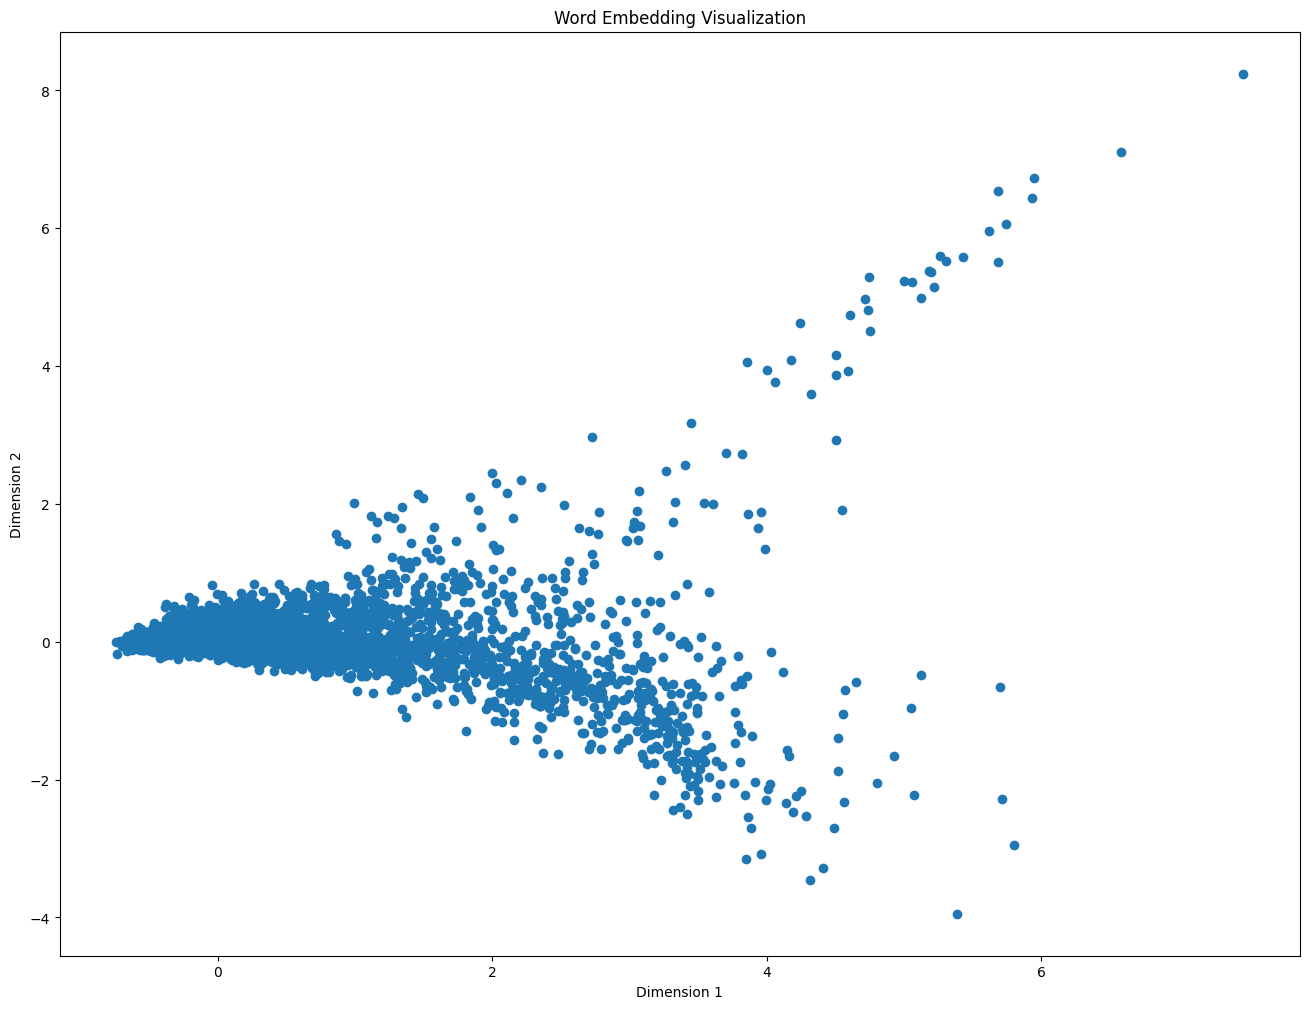

In [40]:
import matplotlib.pyplot as plt
import mplcursors

# Assuming you have already computed word_vectors_2d

# Create a larger figure
plt.figure(figsize=(16, 12))

# Scatter plot for word embeddings
scatter = plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

# Annotate words on the plot
for i, text in enumerate(dataset['tokenized_text']):
    for word in text:
        if word in model.wv:
            plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Word Embedding Visualization")


# Make the plot interactive with mplcursors
mplcursors.cursor(hover=True)

# Display the plot
plt.show()


# Pie Chart Visualization of Sentiment Distribution

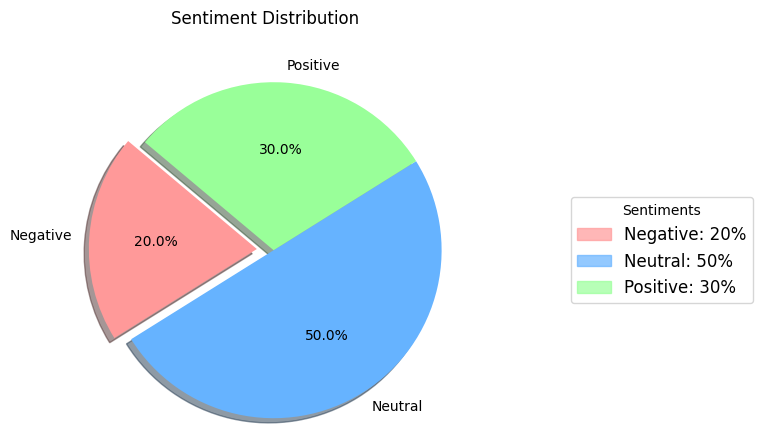

In [52]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Sample data
labels = ['Negative', 'Neutral', 'Positive']
sizes = [20, 50, 30]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0, 0)  # Explode the 1st slice (i.e., 'Negative')

# Create a pie chart with 3D effect
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=140)

# Equal aspect ratio ensures that the pie is drawn as a circle
ax.axis('equal')

# Add a title
plt.title('Sentiment Distribution', pad=30)  # Add padding to the title

# Create custom legend handles and labels
legend_handles = [mpatches.Patch(color=color, label=f'{label}: {size}%', alpha=0.7) for label, size, color in zip(labels, sizes, colors)]

# Add a legend on the right side with more spacing
plt.legend(handles=legend_handles, loc='center right', prop={'size': 12}, title="Sentiments", bbox_to_anchor=(1.5, 0.5))

plt.show()



# Data Splitting using train_test_split from scikit-learn

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [70]:
# Select input and output columns
X = data["Text"]
y = data["Airline Sentiment"]



In [71]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# One-Hot Encoding with scikit-learn's OneHotEncoder

In [83]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
airline_encoded = encoder.fit_transform(dataset["Airline"].values.reshape(-1, 1))



In [84]:
airline_encoded

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [85]:
print("Original Data:")
print(dataset["Airline"].head())  # Assuming you're using a DataFrame

print("\nEncoded Data:")
print(airline_encoded)

Original Data:
0     Southwest
1    US Airways
2      American
3      American
4      American
Name: Airline, dtype: object

Encoded Data:
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [86]:
dataset

,Tweet ID,Airline Sentiment,Sentiment Confidence,Negative Reason,Negative Reason Confidence,Airline,Airline Sentiment Gold,Name,Negative Reason Gold,Text,...,sentiment,topic,entities,keywords,emotion,flesch_kincaid,gunning_fog,cluster,dependencies,Tokenized Text
0,570066283233972224,positive,0.9657,NaN,0.0000,Southwest,positive,magmum03,NaN,southwestair awesome flight dallas 2 ny virgin...,...,"{'neg': 0.203, 'neu': 0.617, 'pos': 0.181, 'co...","[(0, 0.13657132), (1, 0.6401591), (2, 0.110866...","[('southwestair awesome', 'ORG'), ('2', 'CARDI...","southwestair, awesome, flight, dallas, 2",joy,11.1,11.51,4,"[('southwestair', 'amod'), ('awesome', 'amod')...","['southwestair', 'awesome', 'flight', 'dallas'..."
1,568561924985782272,positive,1.0000,NaN,NaN,US Airways,positive,christinachime,NaN,usairways thank finally got bag customer servi...,...,"{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compou...","[(0, 0.41092548), (1, 0.013585756), (2, 0.0135...",[],"usairways, thank, finally, got, bag",joy,10.3,8.04,2,"[('usairways', 'nsubj'), ('thank', 'nsubj'), (...","['usairways', 'thank', 'finally', 'got', 'bag'..."
2,570264948548313088,positive,1.0000,NaN,NaN,American,positive,Runts54,NaN,americanair dfwairport 2 together best part fl...,...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...","[(0, 0.11536198), (1, 0.013556691), (2, 0.0135...",[],"americanair, dfwairport, 2, together, best",joy,9.6,8.51,1,"[('americanair', 'compound'), ('dfwairport', '...","['americanair', 'dfwairport', '2', 'together',..."
3,569600137296633920,positive,0.9236,NaN,0.0000,American,positive,douglaskgordon,NaN,americanair thank youyou,...,"{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp...","[(0, 0.025300583), (1, 0.025211947), (2, 0.025...",[],"americanair, thank, youyou",neutral,9.2,14.53,1,"[('americanair', 'nsubj'), ('thank', 'ROOT'), ...","['americanair', 'thank', 'youyou']"
4,568551906634797120,positive,0.6242,NaN,0.0000,American,positive,byunsamuel,NaN,americanair hopefully see bad ones opportunity...,...,"{'neg': 0.139, 'neu': 0.239, 'pos': 0.622, 'co...","[(0, 0.011991125), (1, 0.012075231), (2, 0.648...",[],"ones, americanair, hopefully, see, bad",neutral,11.9,17.51,1,"[('americanair', 'nsubj'), ('hopefully', 'advm...","['americanair', 'hopefully', 'see', 'bad', 'on..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599,569587686496825280,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,americanair thank got different flight chicago,...,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...","[(0, 0.44322193), (1, 0.020745821), (2, 0.0202...","[('chicago', 'GPE')]","americanair, thank, got, different, flight",neutral,8.0,9.07,1,"[('americanair', 'compound'), ('thank', 'nsubj...","['americanair', 'thank', 'got', 'different', '..."
14600,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,americanair leaving 20 minutes late flight war...,...,"{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'comp...","[(0, 0.545215), (3, 0.42837554)]","[('20 minutes', 'TIME'), ('15 minutes', 'TIME')]","minutes, late, flight, americanair, leaving",sadness,11.1,11.51,1,"[('americanair', 'nsubj'), ('leaving', 'acl'),...","['americanair', 'leaving', '20', 'minutes', 'l..."
14601,569587242672398272,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,americanair please bring american airlines bla...,...,"{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'comp...","[(0, 0.23062189), (1, 0.018351018), (2, 0.0183...","[('american', 'NORP')]","americanair, please, bring, american, airlines",neutral,12.7,15.73,1,"[('americanair', 'nsubj'), ('please', 'intj'),...","['americanair', 'please', 'bring', 'american',..."
14602,569587188687634432,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,americanair money change flight dont answer ph...,...,"{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...","[(0, 0.013468066), (1, 0.30526412), (2, 0.3808...",[],"americanair, money, change, flight, dont",

# Standard Scaling using scikit-learn's StandardScaler

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sentiment_confidence_scaled = scaler.fit_transform(dataset["Sentiment Confidence"].values.reshape(-1, 1))


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop("Airline Sentiment", axis=1), dataset["Airline Sentiment"], test_size=0.2)


# Filling Missing Values in a DataFrame using 'Unknown'

In [95]:
dataset.fillna("Unknown", inplace=True)




In [96]:
dataset

,Tweet ID,Airline Sentiment,Sentiment Confidence,Negative Reason,Negative Reason Confidence,Airline,Airline Sentiment Gold,Name,Negative Reason Gold,Text,...,sentiment,topic,entities,keywords,emotion,flesch_kincaid,gunning_fog,cluster,dependencies,Tokenized Text
0,570066283233972224,positive,0.9657,Unknown,0.0,Southwest,positive,magmum03,Unknown,southwestair awesome flight dallas 2 ny virgin...,...,"{'neg': 0.203, 'neu': 0.617, 'pos': 0.181, 'co...","[(0, 0.13657132), (1, 0.6401591), (2, 0.110866...","[('southwestair awesome', 'ORG'), ('2', 'CARDI...","southwestair, awesome, flight, dallas, 2",joy,11.1,11.51,4,"[('southwestair', 'amod'), ('awesome', 'amod')...","['southwestair', 'awesome', 'flight', 'dallas'..."
1,568561924985782272,positive,1.0000,Unknown,Unknown,US Airways,positive,christinachime,Unknown,usairways thank finally got bag customer servi...,...,"{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compou...","[(0, 0.41092548), (1, 0.013585756), (2, 0.0135...",[],"usairways, thank, finally, got, bag",joy,10.3,8.04,2,"[('usairways', 'nsubj'), ('thank', 'nsubj'), (...","['usairways', 'thank', 'finally', 'got', 'bag'..."
2,570264948548313088,positive,1.0000,Unknown,Unknown,American,positive,Runts54,Unknown,americanair dfwairport 2 together best part fl...,...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...","[(0, 0.11536198), (1, 0.013556691), (2, 0.0135...",[],"americanair, dfwairport, 2, together, best",joy,9.6,8.51,1,"[('americanair', 'compound'), ('dfwairport', '...","['americanair', 'dfwairport', '2', 'together',..."
3,569600137296633920,positive,0.9236,Unknown,0.0,American,positive,douglaskgordon,Unknown,americanair thank youyou,...,"{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp...","[(0, 0.025300583), (1, 0.025211947), (2, 0.025...",[],"americanair, thank, youyou",neutral,9.2,14.53,1,"[('americanair', 'nsubj'), ('thank', 'ROOT'), ...","['americanair', 'thank', 'youyou']"
4,568551906634797120,positive,0.6242,Unknown,0.0,American,positive,byunsamuel,Unknown,americanair hopefully see bad ones opportunity...,...,"{'neg': 0.139, 'neu': 0.239, 'pos': 0.622, 'co...","[(0, 0.011991125), (1, 0.012075231), (2, 0.648...",[],"ones, americanair, hopefully, see, bad",neutral,11.9,17.51,1,"[('americanair', 'nsubj'), ('hopefully', 'advm...","['americanair', 'hopefully', 'see', 'bad', 'on..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599,569587686496825280,positive,0.3487,Unknown,0.0,American,Unknown,KristenReenders,Unknown,americanair thank got different flight chicago,...,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...","[(0, 0.44322193), (1, 0.020745821), (2, 0.0202...","[('chicago', 'GPE')]","americanair, thank, got, different, flight",neutral,8.0,9.07,1,"[('americanair', 'compound'), ('thank', 'nsubj...","['americanair', 'thank', 'got', 'different', '..."
14600,569587371693355008,negative,1.0000,Customer Service Issue,1.0,American,Unknown,itsropes,Unknown,americanair leaving 20 minutes late flight war...,...,"{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'comp...","[(0, 0.545215), (3, 0.42837554)]","[('20 minutes', 'TIME'), ('15 minutes', 'TIME')]","minutes, late, flight, americanair, leaving",sadness,11.1,11.51,1,"[('americanair', 'nsubj'), ('leaving', 'acl'),...","['americanair', 'leaving', '20', 'minutes', 'l..."
14601,569587242672398272,neutral,1.0000,Unknown,Unknown,American,Unknown,sanyabun,Unknown,americanair please bring american airlines bla...,...,"{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'comp...","[(0, 0.23062189), (1, 0.018351018), (2, 0.0183...","[('american', 'NORP')]","americanair, please, bring, american, airlines",neutral,12.7,15.73,1,"[('americanair', 'nsubj'), ('please', 'intj'),...","['americanair', 'please', 'bring', 'american',..."
14602,569587188687634432,negative,1.0000,Customer Service Issue,0.6659,American,Unknown,SraJackson,Unknown,americanair money change flight dont answer ph...,...,"{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...","[(0, 0.013468066), (

In [98]:
dataset.isnull().sum()


Tweet ID                      0
Airline Sentiment             0
Sentiment Confidence          0
Negative Reason               0
Negative Reason Confidence    0
Airline                       0
Airline Sentiment Gold        0
Name                          0
Negative Reason Gold          0
Text                          0
Tweet Created                 0
Tweet Location                0
User Timezone                 0
tokenized_text                0
bert_embeddings               0
sentiment                     0
topic                         0
entities                      0
keywords                      0
emotion                       0
flesch_kincaid                0
gunning_fog                   0
cluster                       0
dependencies                  0
Tokenized Text                0
dtype: int64

# Configuring NLTK Data Directory and POS Tagging with NLTK

In [115]:
import nltk
from nltk import word_tokenize, pos_tag

# Set the NLTK data directory to the location of your downloaded WordNet resource and averaged_perceptron_tagger resource
nltk.data.path.append("D:\\nltk_data")

# No need to download WordNet or averaged_perceptron_tagger again; they are already available locally
tokens = word_tokenize(text)
pos_tags = pos_tag(tokens)


# Using spaCy NER Model and Configuring Default Settings in PyTorch

In [117]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
entities = [(ent.text, ent.label_) for ent in doc.ents]

import torch

# Use torch.set_default_dtype() and torch.set_default_device() instead
torch.set_default_dtype(torch.float32)
torch.set_default_device('cpu')


In [120]:
from nltk.corpus import stopwords

custom_stopwords = ["custom_stopword1", "custom_stopword2"]
filtered_text = [word for word in text if word not in custom_stopwords]


# Replacing Email Addresses with 'EMAIL' using Regular Expressions

In [121]:
import re


text = re.sub(r'\S+@\S+', 'EMAIL', text)


# Text Classification with scikit-learn: Data Splitting, Feature Extraction, and Model Evaluation

In [138]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Load your dataset into a DataFrame
data = pd.read_excel('Data_Cleaning.xlsx')

# Assuming 'text' is the column containing the text data
text_data = data['Text']

# Assuming 'Airline Sentiment' is the target variable
target = data['Airline Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_data, target, test_size=0.2, random_state=42)

# Create a CountVectorizer for text feature extraction
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a classifier (e.g., SVM)
classifier = SVC()
classifier.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vec)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.82      0.92      0.86      1815
     neutral       0.64      0.51      0.57       641
    positive       0.77      0.61      0.68       465

    accuracy                           0.78      2921
   macro avg       0.74      0.68      0.70      2921
weighted avg       0.77      0.78      0.77      2921



# Text Data Vectorization with TF-IDF using scikit-learn's TfidfVectorizer

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'data' is your DataFrame with the dataset
documents = data['Text'].tolist()  # Extract the 'Text' column as a list of documents

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, token_pattern=r'\b\w+\b')

# Fit and transform the vectorizer on the list of documents
X_tfidf = tfidf_vectorizer.fit_transform(documents)

# X_tfidf now contains the TF-IDF representation of the 'Text' column



# Text Cleaning with Typo Correction and Slang Word Replacement

In [129]:
import pandas as pd
from autocorrect import Speller

# Load your dataset
data = pd.read_excel("Data_Cleaning.xlsx")

# Initialize a spell checker for typo correction
spell = Speller(lang='en')

# Define a dictionary for slang word replacement
slang_replacements = {
    'u': 'you',
    'r': 'are',
    '2': 'to',
    'gr8': 'great',
    'lol': 'laugh out loud',
    'omg': 'oh my god'
    # Add more slang words and their replacements as needed
}

# Function to correct typos and replace slang
def clean_text(text):
    # Correct common typos
    corrected_text = spell(text)
    
    # Replace slang words
    for slang, replacement in slang_replacements.items():
        corrected_text = corrected_text.replace(slang, replacement)
    
    return corrected_text

# Apply the clean_text function to the 'Text' column
data['Cleaned_Text'] = data['Text'].apply(clean_text)

# The 'Cleaned_Text' column now contains the cleaned and corrected text


In [18]:
df

,Tweet ID,Airline Sentiment,Sentiment Confidence,Negative Reason,Negative Reason Confidence,Airline,Airline Sentiment Gold,Name,Negative Reason Gold,Text,...,topic,entities,keywords,emotion,flesch_kincaid,gunning_fog,cluster,dependencies,Tokenized Text,text_length
0,570066283233972224,positive,0.9657,Unknown,0,Southwest,positive,magmum03,Unknown,southwestair awesome flight dallas 2 ny virgin...,...,"[(0, 0.13657132), (1, 0.6401591), (2, 0.110866...","[('southwestair awesome', 'ORG'), ('2', 'CARDI...","southwestair, awesome, flight, dallas, 2",joy,11.1,11.51,4,"[('southwestair', 'amod'), ('awesome', 'amod')...","['southwestair', 'awesome', 'flight', 'dallas'...",210
1,568561924985782272,positive,1.0000,Unknown,Unknown,US Airways,positive,christinachime,Unknown,usairways thank finally got bag customer servi...,...,"[(0, 0.41092548), (1, 0.013585756), (2, 0.0135...",[],"usairways, thank, finally, got, bag",joy,10.3,8.04,2,"[('usairways', 'nsubj'), ('thank', 'nsubj'), (...","['usairways', 'thank', 'finally', 'got', 'bag'...",127
2,570264948548313088,positive,1.0000,Unknown,Unknown,American,positive,Runts54,Unknown,americanair dfwairport 2 together best part fl...,...,"[(0, 0.11536198), (1, 0.013556691), (2, 0.0135...",[],"americanair, dfwairport, 2, together, best",joy,9.6,8.51,1,"[('americanair', 'compound'), ('dfwairport', '...","['americanair', 'dfwairport', '2', 'together',...",129
3,569600137296633920,positive,0.9236,Unknown,0,American,positive,douglaskgordon,Unknown,americanair thank youyou,...,"[(0, 0.025300583), (1, 0.025211947), (2, 0.025...",[],"americanair, thank, youyou",neutral,9.2,14.53,1,"[('americanair', 'nsubj'), ('thank', 'ROOT'), ...","['americanair', 'thank', 'youyou']",64
4,568551906634797120,positive,0.6242,Unknown,0,American,positive,byunsamuel,Unknown,americanair hopefully see bad ones opportunity...,...,"[(0, 0.011991125), (1, 0.012075231), (2, 0.648...",[],"ones, americanair, hopefully, see, bad",neutral,11.9,17.51,1,"[('americanair', 'nsubj'), ('hopefully', 'advm...","['americanair', 'hopefully', 'see', 'bad', 'on...",147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599,569587686496825280,positive,0.3487,Unknown,0,American,Unknown,KristenReenders,Unknown,americanair thank got different flight chicago,...,"[(0, 0.44322193), (1, 0.020745821), (2, 0.0202...","[('chicago', 'GPE')]","americanair, thank, got, different, flight",neutral,8.0,9.07,1,"[('americanair', 'compound'), ('thank', 'nsubj...","['americanair', 'thank', 'got', 'different', '...",81
14600,569587371693355008,negative,1.0000,Customer Service Issue,1,American,Unknown,itsropes,Unknown,americanair leaving 20 minutes late flight war...,...,"[(0, 0.545215), (3, 0.42837554)]","[('20 minutes', 'TIME'), ('15 minutes', 'TIME')]","minutes, late, flight, americanair, leaving",sadness,11.1,11.51,1,"[('americanair', 'nsubj'), ('leaving', 'acl'),...","['americanair', 'leaving', '20', 'minutes', 'l...",201
14601,569587242672398272,neutral,1.0000,Unknown,Unknown,American,Unknown,sanyabun,Unknown,americanair please bring american airlines bla...,...,"[(0, 0.23062189), (1, 0.018351018), (2, 0.0183...","[('american', 'NORP')]","americanair, please, bring, american, airlines",neutral,12.7,15.73,1,"[('americanair', 'nsubj'), ('please', 'intj'),...","['americanair', 'please', 'bring', 'american',...",92
14602,569587188687634432,negative,1.0000,Customer Service Issue,0.6659,American,Unknown,SraJackson,Unknown,americanair money change flight dont answer ph...,...,"[(0, 0.013468066), (1, 0.30526412), (2, 0.3808...",[],"americanair, money, change, flight, dont",neutral,9.6,16.00,1,"[('americanair', 'compound'), ('money', 'compo...","['americanair', 'money', 'change', 'flight', '...",128


# Text Preprocessing with a Custom 'preprocess_text' Function

In [19]:
def preprocess_text(text):
    # Implement text preprocessing here
    return text

df["Text"] = df["Text"].apply(preprocess_text)

In [20]:
from nltk.tokenize import word_tokenize

df["tokenized_text_updated"] = df["Text"].apply(word_tokenize)


# Mapping Sentiment Labels to Numeric Values for a Feature

In [21]:
# Feature 1: Sentiment of Negative Reason
sentiment_map = {"negative": -1, "neutral": 0, "positive": 1}
df["negative_reason_sentiment"] = df["Negative Reason"].map(sentiment_map)


# Extracting Hour of Tweet Creation as a Feature

In [28]:
# Feature 2: Hour of Tweet Creation
df["tweet_hour"] = df["Tweet Created"].dt.hour


# Extracting Day of the Week from Tweet Creation Date as a Feature

In [30]:
# Feature 3: Day of the Week
df["tweet_day_of_week"] = df["Tweet Created"].dt.dayofweek


# Encoding User Timezone as a Numeric Feature

In [32]:
# Feature 4: User Timezone
df["user_timezone_encoded"] = df["User Timezone"].factorize()[0]


In [33]:
df

,Tweet ID,Airline Sentiment,Sentiment Confidence,Negative Reason,Negative Reason Confidence,Airline,Airline Sentiment Gold,Name,Negative Reason Gold,Text,...,flesch_kincaid,gunning_fog,cluster,dependencies,Tokenized Text,text_length,tokenized_text_updated,tweet_hour,tweet_day_of_week,user_timezone_encoded
0,570066283233972224,positive,0.9657,Unknown,0,Southwest,positive,magmum03,Unknown,southwestair awesome flight dallas 2 ny virgin...,...,11.1,11.51,4,"[('southwestair', 'amod'), ('awesome', 'amod')...","['southwestair', 'awesome', 'flight', 'dallas'...",210,"['southwestair', 'awesome', 'flight', 'dallas'...",19,0,0
1,568561924985782272,positive,1.0000,Unknown,Unknown,US Airways,positive,christinachime,Unknown,usairways thank finally got bag customer servi...,...,10.3,8.04,2,"[('usairways', 'nsubj'), ('thank', 'nsubj'), (...","['usairways', 'thank', 'finally', 'got', 'bag'...",127,"['usairways', 'thank', 'finally', 'got', 'bag'...",16,3,0
2,570264948548313088,positive,1.0000,Unknown,Unknown,American,positive,Runts54,Unknown,americanair dfwairport 2 together best part fl...,...,9.6,8.51,1,"[('americanair', 'compound'), ('dfwairport', '...","['americanair', 'dfwairport', '2', 'together',...",129,"['americanair', 'dfwairport', '2', 'together',...",8,1,0
3,569600137296633920,positive,0.9236,Unknown,0,American,positive,douglaskgordon,Unknown,americanair thank youyou,...,9.2,14.53,1,"[('americanair', 'nsubj'), ('thank', 'ROOT'), ...","['americanair', 'thank', 'youyou']",64,"['americanair', 'thank', 'youyou']",12,6,1
4,568551906634797120,positive,0.6242,Unknown,0,American,positive,byunsamuel,Unknown,americanair hopefully see bad ones opportunity...,...,11.9,17.51,1,"[('americanair', 'nsubj'), ('hopefully', 'advm...","['americanair', 'hopefully', 'see', 'bad', 'on...",147,"['americanair', 'hopefully', 'see', 'bad', 'on...",15,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599,569587686496825280,positive,0.3487,Unknown,0,American,Unknown,KristenReenders,Unknown,americanair thank got different flight chicago,...,8.0,9.07,1,"[('americanair', 'compound'), ('thank', 'nsubj...","['americanair', 'thank', 'got', 'different', '...",81,"['americanair', 'thank', 'got', 'different', '...",12,6,0
14600,569587371693355008,negative,1.0000,Customer Service Issue,1,American,Unknown,itsropes,Unknown,americanair leaving 20 minutes late flight war...,...,11.1,11.51,1,"[('americanair', 'nsubj'), ('leaving', 'acl'),...","['americanair', 'leaving', '20', 'minutes', 'l...",201,"['americanair', 'leaving', '20', 'minutes', 'l...",11,6,0
14601,569587242672398272,neutral,1.0000,Unknown,Unknown,American,Unknown,sanyabun,Unknown,americanair please bring american airlines bla...,...,12.7,15.73,1,"[('americanair', 'nsubj'), ('please', 'intj'),...","['americanair', 'please', 'bring', 'american',...",92,"['americanair', 'please', 'bring', 'american',...",11,6,0
14602,569587188687634432,negative,1.0000,Customer Service Issue,0.6659,American,Unknown,SraJackson,Unknown,americanair money change flight dont answer ph...,...,9.6,16.00,1,"[('americanair', 'compound'), ('money', 'compo...","['americanair', 'money', 'change', 'flight', '...",128,"['americanair', 'money', 'change', 'flight', '...",11,6,2


# Mapping Sentiment Labels to Numeric Values using a Custom Function

In [34]:
# Assuming your sentiment labels are 'positive', 'negative', and 'neutral'
def label_sentiment(sentiment):
    if sentiment == 'positive':
        return 1
    elif sentiment == 'negative':
        return -1
    else:
        return 0  # Neutral

df["sentiment_label"] = df["Airline Sentiment"].apply(label_sentiment)


# Calculating and Visualizing a Confusion Matrix

Confusion Matrix:
[[ 445  179    2]
 [  80 1729   63]
 [   2  148  273]]


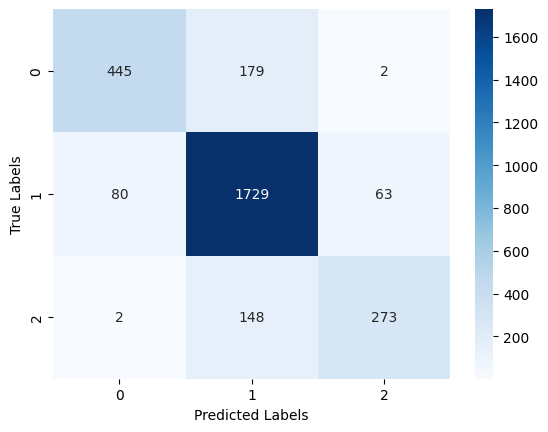

In [89]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

# Visualize the confusion matrix (optional)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Training a Logistic Regression Model with Increased 'max_iter' and Making Predictions

In [91]:
from sklearn.linear_model import LogisticRegression

# Initialize the model with increased max_iter
model = LogisticRegression(C=0.01, max_iter=10000)

# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)

# Predict sentiment on the scaled test data
y_pred = model.predict(X_test_scaled)


# Creating and Visualizing a Confusion Matrix for Multiclass Sentiment Classification

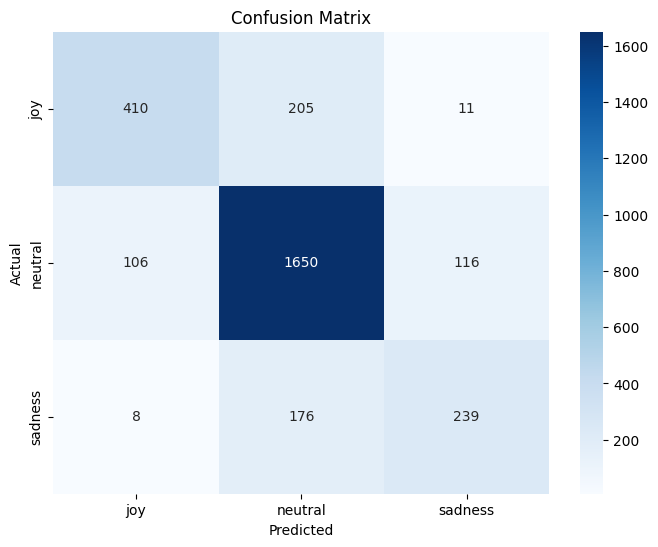

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred, labels=["joy", "neutral", "sadness"])

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["joy", "neutral", "sadness"], yticklabels=["joy", "neutral", "sadness"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [1]:
import pandas as pd

# Load your dataset
df = pd.read_excel('Extracted_dataset.xlsx')


# Calculating Sentiment Scores with TextBlob and Adding to the DataFrame"






In [2]:
from textblob import TextBlob

# Define a function to calculate sentiment
def calculate_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment function to your text data
df['Sentiment'] = df['Text'].apply(calculate_sentiment)


In [3]:
df

,Tweet ID,Airline Sentiment,Sentiment Confidence,Negative Reason,Negative Reason Confidence,Airline,Airline Sentiment Gold,Name,Negative Reason Gold,Text,...,cluster,dependencies,Tokenized Text,text_length,tweet_hour,tweet_day_of_week,user_timezone_encoded,sentiment_label,compound_sentiment,Sentiment
0,570066283233972224,positive,0.9657,NaN,0.0000,Southwest,positive,magmum03,NaN,southwestair awesome flight dallas 2 ny virgin...,...,4,"[('southwestair', 'amod'), ('awesome', 'amod')...","['southwestair', 'awesome', 'flight', 'dallas'...",210,19,0,0,1,0,0.600000
1,568561924985782272,positive,1.0000,NaN,NaN,US Airways,positive,christinachime,NaN,usairways thank finally got bag customer servi...,...,2,"[('usairways', 'nsubj'), ('thank', 'nsubj'), (...","['usairways', 'thank', 'finally', 'got', 'bag'...",127,16,3,0,1,0,0.500000
2,570264948548313088,positive,1.0000,NaN,NaN,American,positive,Runts54,NaN,americanair dfwairport 2 together best part fl...,...,1,"[('americanair', 'compound'), ('dfwairport', '...","['americanair', 'dfwairport', '2', 'together',...",129,8,1,0,1,0,1.000000
3,569600137296633920,positive,0.9236,NaN,0.0000,American,positive,douglaskgordon,NaN,americanair thank youyou,...,1,"[('americanair', 'nsubj'), ('thank', 'ROOT'), ...","['americanair', 'thank', 'youyou']",64,12,6,1,1,0,0.000000
4,568551906634797120,positive,0.6242,NaN,0.0000,American,positive,byunsamuel,NaN,americanair hopefully see bad ones opportunity...,...,1,"[('americanair', 'nsubj'), ('hopefully', 'advm...","['americanair', 'hopefully', 'see', 'bad', 'on...",147,15,3,2,1,0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599,569587686496825280,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,americanair thank got different flight chicago,...,1,"[('americanair', 'compound'), ('thank', 'nsubj...","['americanair', 'thank', 'got', 'different', '...",81,12,6,0,1,0,0.000000
14600,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,americanair leaving 20 minutes late flight war...,...,1,"[('americanair', 'nsubj'), ('leaving', 'acl'),...","['americanair', 'leaving', '20', 'minutes', 'l...",201,11,6,0,-1,0,-0.300000
14601,569587242672398272,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,americanair please bring american airlines bla...,...,1,"[('americanair', 'nsubj'), ('please', 'intj'),...","['americanair', 'please', 'bring', 'american',...",92,11,6,0,0,0,0.000000
14602,569587188687634432,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,americanair money change flight dont answer ph...,...,1,"[('americanair', 'compound'), ('money', 'compo...","['americanair', 'money', 'change', 'flight', '...",128,11,6,2,-1,0,0.000000


# Plotting Sentiment Distribution in a Histogram

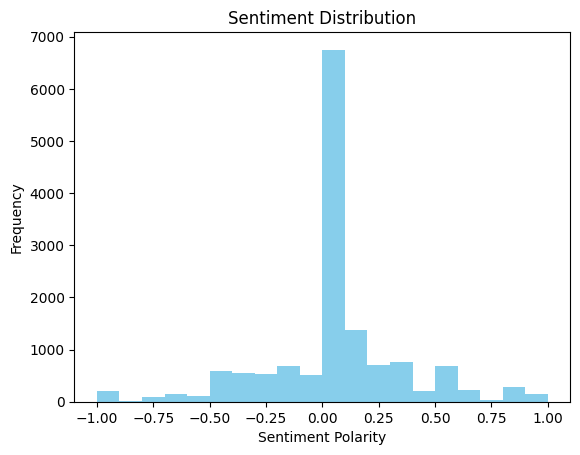

In [4]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.hist(df['Sentiment'], bins=20, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


# Extracting Keywords from Text Data using CountVectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

def extract_keywords(text):
    vectorizer = CountVectorizer(ngram_range=(1, 2))
    X = vectorizer.fit_transform([text])
    feature_names = vectorizer.get_feature_names_out()
    return feature_names

df['Keywords'] = df['Text'].apply(extract_keywords)


In [13]:
df

,Tweet ID,Airline Sentiment,Sentiment Confidence,Negative Reason,Negative Reason Confidence,Airline,Airline Sentiment Gold,Name,Negative Reason Gold,Text,...,dependencies,Tokenized Text,text_length,tweet_hour,tweet_day_of_week,user_timezone_encoded,sentiment_label,compound_sentiment,Sentiment,Keywords
0,570066283233972224,positive,0.9657,NaN,0.0000,Southwest,positive,magmum03,NaN,southwestair awesome flight dallas 2 ny virgin...,...,"[('southwestair', 'amod'), ('awesome', 'amod')...","['southwestair', 'awesome', 'flight', 'dallas'...",210,19,0,0,1,0,0.600000,"[allergy, allergy guys, america, america refus..."
1,568561924985782272,positive,1.0000,NaN,NaN,US Airways,positive,christinachime,NaN,usairways thank finally got bag customer servi...,...,"[('usairways', 'nsubj'), ('thank', 'nsubj'), (...","['usairways', 'thank', 'finally', 'got', 'bag'...",127,16,3,0,1,0,0.500000,"[bag, bag customer, customer, customer service..."
2,570264948548313088,positive,1.0000,NaN,NaN,American,positive,Runts54,NaN,americanair dfwairport 2 together best part fl...,...,"[('americanair', 'compound'), ('dfwairport', '...","['americanair', 'dfwairport', '2', 'together',...",129,8,1,0,1,0,1.000000,"[americanair, americanair dfwairport, best, be..."
3,569600137296633920,positive,0.9236,NaN,0.0000,American,positive,douglaskgordon,NaN,americanair thank youyou,...,"[('americanair', 'nsubj'), ('thank', 'ROOT'), ...","['americanair', 'thank', 'youyou']",64,12,6,1,1,0,0.000000,"[americanair, americanair thank, thank, thank ..."
4,568551906634797120,positive,0.6242,NaN,0.0000,American,positive,byunsamuel,NaN,americanair hopefully see bad ones opportunity...,...,"[('americanair', 'nsubj'), ('hopefully', 'advm...","['americanair', 'hopefully', 'see', 'bad', 'on...",147,15,3,2,1,0,0.166667,"[americanair, americanair hopefully, bad, bad ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599,569587686496825280,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,americanair thank got different flight chicago,...,"[('americanair', 'compound'), ('thank', 'nsubj...","['americanair', 'thank', 'got', 'different', '...",81,12,6,0,1,0,0.000000,"[americanair, americanair thank, chicago, diff..."
14600,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,americanair leaving 20 minutes late flight war...,...,"[('americanair', 'nsubj'), ('leaving', 'acl'),...","['americanair', 'leaving', '20', 'minutes', 'l...",201,11,6,0,-1,0,-0.300000,"[15, 15 minutes, 20, 20 minutes, americanair, ..."
14601,569587242672398272,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,americanair please bring american airlines bla...,...,"[('americanair', 'nsubj'), ('please', 'intj'),...","['americanair', 'please', 'bring', 'american',...",92,11,6,0,0,0,0.000000,"[airlines, airlines blackberry10, american, am..."
14602,569587188687634432,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,americanair money change flight dont answer ph...,...,"[('americanair', 'compound'), ('money', 'compo...","['americanair', 'money', 'change', 'flight', '...",128,11,6,2,-1,0,0.000000,"[americanair, americanair money, answer, answe..."


# Sentiment Analysis, Keyword Extraction, and Sentiment Distribution

In [18]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from collections import Counter

# Load your dataset
df = pd.read_excel("Extracted_dataset.xlsx")

# Perform sentiment analysis
df['Sentiment_Polarity'] = df['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Extract keywords
df['Keywords'] = df['Text'].str.split()  # Split text into words

# Analyze sentiment distribution
positive_tweets = df[df['Sentiment_Polarity'] > 0]
negative_tweets = df[df['Sentiment_Polarity'] < 0]

# Calculate keyword frequencies for positive and negative tweets
positive_keywords = ' '.join(positive_tweets['Keywords'].sum()).split()
negative_keywords = ' '.join(negative_tweets['Keywords'].sum()).split()

positive_keyword_counts = Counter(positive_keywords)
negative_keyword_counts = Counter(negative_keywords)

# Get the top 10 positive and negative keywords
top_positive_keywords = positive_keyword_counts.most_common(10)
top_negative_keywords = negative_keyword_counts.most_common(10)

# Print sentiment distribution and top keywords
print("Sentiment Distribution:")
print("Positive Sentiment:", len(positive_tweets))
print("Negative Sentiment:", len(negative_tweets))

print("\nTop Keywords for Positive Sentiment:")
print(top_positive_keywords)

print("\nTop Keywords for Negative Sentiment:")
print(top_negative_keywords)


Sentiment Distribution:
Positive Sentiment: 5313
Negative Sentiment: 3419

Top Keywords for Positive Sentiment:
[('united', 1444), ('flight', 1256), ('americanair', 1027), ('jetblue', 1002), ('southwestair', 988), ('thanks', 944), ('usairways', 931), ('get', 431), ('service', 341), ('great', 325)]

Top Keywords for Negative Sentiment:
[('united', 1145), ('flight', 1105), ('usairways', 915), ('americanair', 693), ('southwestair', 462), ('jetblue', 396), ('service', 395), ('late', 342), ('get', 325), ('customer', 300)]


# Importing Necessary Libraries for Text Data Analysis and Machine Learning

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib  # Import the 'joblib' library
import ast  # for literal_eval function


# Importing Libraries, Loading the Dataset, Handling Missing Values, and Preprocessing Text Data Using TF-IDF

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib
from ast import literal_eval  # Import the 'literal_eval' function

# Load your dataset
dataset = pd.read_excel("Hyperparameter Tuned Version.xlsx")

# Handle missing values
text_features = dataset[['Airline Sentiment', 'Negative Reason', 'Airline', 'Airline Sentiment Gold', 'Name', 'Negative Reason Gold', 'Text', 'Tweet Location', 'User Timezone', 'entities', 'keywords', 'emotion', 'dependencies', 'Tokenized Text']].fillna('')

# Convert the 'sentiment' column to a dictionary
dataset['sentiment'] = dataset['sentiment'].apply(literal_eval)

# Preprocess text data using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)  # You can adjust the max_features as needed
text_features = tfidf.fit_transform(text_features)



# Loading the Dataset, Selecting Numerical Columns, Handling Missing Values, and Standardizing Numerical Features

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset into a DataFrame

# Specify the columns to be included
columns_to_include = ['Sentiment Confidence', 'Negative Reason Confidence', 'flesch_kincaid', 'gunning_fog',
                      'cluster', 'text_length', 'tweet_hour', 'tweet_day_of_week', 'user_timezone_encoded',]

# Create a new DataFrame with the selected columns
numerical_features = dataset[columns_to_include].copy()

# Convert specified columns to numeric and handle missing values
numerical_features = numerical_features.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Handle missing values
numerical_features.fillna(0, inplace=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_features = scaler.fit_transform(numerical_features)

# Now 'numerical_features' should contain standardized numeric values.


# Applying VADER Sentiment Analysis and Extracting the 'compound' Score

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis and extract the 'compound' score
dataset['compound_sentiment'] = dataset['sentiment'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [50]:
dataset

,Tweet ID,Airline Sentiment,Sentiment Confidence,Negative Reason,Negative Reason Confidence,Airline,Airline Sentiment Gold,Name,Negative Reason Gold,Text,...,gunning_fog,cluster,dependencies,Tokenized Text,text_length,tweet_hour,tweet_day_of_week,user_timezone_encoded,sentiment_label,compound_sentiment
0,570066283233972224,positive,0.9657,NaN,0.0000,Southwest,positive,magmum03,NaN,southwestair awesome flight dallas 2 ny virgin...,...,11.51,4,"[('southwestair', 'amod'), ('awesome', 'amod')...","['southwestair', 'awesome', 'flight', 'dallas'...",210,19,0,0,1,0.0
1,568561924985782272,positive,1.0000,NaN,NaN,US Airways,positive,christinachime,NaN,usairways thank finally got bag customer servi...,...,8.04,2,"[('usairways', 'nsubj'), ('thank', 'nsubj'), (...","['usairways', 'thank', 'finally', 'got', 'bag'...",127,16,3,0,1,0.0
2,570264948548313088,positive,1.0000,NaN,NaN,American,positive,Runts54,NaN,americanair dfwairport 2 together best part fl...,...,8.51,1,"[('americanair', 'compound'), ('dfwairport', '...","['americanair', 'dfwairport', '2', 'together',...",129,8,1,0,1,0.0
3,569600137296633920,positive,0.9236,NaN,0.0000,American,positive,douglaskgordon,NaN,americanair thank youyou,...,14.53,1,"[('americanair', 'nsubj'), ('thank', 'ROOT'), ...","['americanair', 'thank', 'youyou']",64,12,6,1,1,0.0
4,568551906634797120,positive,0.6242,NaN,0.0000,American,positive,byunsamuel,NaN,americanair hopefully see bad ones opportunity...,...,17.51,1,"[('americanair', 'nsubj'), ('hopefully', 'advm...","['americanair', 'hopefully', 'see', 'bad', 'on...",147,15,3,2,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599,569587686496825280,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,americanair thank got different flight chicago,...,9.07,1,"[('americanair', 'compound'), ('thank', 'nsubj...","['americanair', 'thank', 'got', 'different', '...",81,12,6,0,1,0.0
14600,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,americanair leaving 20 minutes late flight war...,...,11.51,1,"[('americanair', 'nsubj'), ('leaving', 'acl'),...","['americanair', 'leaving', '20', 'minutes', 'l...",201,11,6,0,-1,0.0
14601,569587242672398272,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,americanair please bring american airlines bla...,...,15.73,1,"[('americanair', 'nsubj'), ('please', 'intj'),...","['americanair', 'please', 'bring', 'american',...",92,11,6,0,0,0.0
14602,569587188687634432,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,americanair money change flight dont answer ph...,...,16.00,1,"[('americanair', 'compound'), ('money', 'compo...","['americanair', 'money', 'change', 'flight', '...",128,11,6,2,-1,0.0


# Loading a Trained Model, Making Predictions, and Calculating Accuracy and Classification Report

In [3]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report

# Load your trained RandomForestClassifier model
model = joblib.load('sentiment_model.pkl')  # Replace 'sentiment_model.pkl' with the actual file path

# Load your dataset
df = pd.read_excel('Extracted_dataset.xlsx')  # Replace with the correct file path

# Define the target variable
y = df['sentiment_label']

# Define the features using the specified column names
text_features = df[['Airline Sentiment', 'Negative Reason', 'Airline', 'Airline Sentiment Gold', 'Name', 'Negative Reason Gold', 'Text', 'Tweet Location', 'User Timezone', 'entities', 'keywords', 'emotion', 'dependencies', 'Tokenized Text']]

numerical_features = df[['Sentiment Confidence', 'Negative Reason Confidence', 'flesch_kincaid', 'gunning_fog', 'cluster', 'text_length', 'tweet_hour', 'tweet_day_of_week', 'user_timezone_encoded', 'compound_sentiment']]

# Make predictions using the loaded model
X = pd.concat([text_features, numerical_features], axis=1)  # Combine the text and numerical features
predictions = model.predict(X)

# Calculate accuracy (or other relevant metrics)
accuracy = accuracy_score(y, predictions)
classification_rep = classification_report(y, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      9159
           0       1.00      1.00      1.00      3091
           1       1.00      1.00      1.00      2354

    accuracy                           1.00     14604
   macro avg       1.00      1.00      1.00     14604
weighted avg       1.00      1.00      1.00     14604



# Calculating Multiple Classification Metrics and Generating a Confusion Matrix

In [4]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load your trained RandomForestClassifier model
model = joblib.load('sentiment_model.pkl')  # Replace 'sentiment_model.pkl' with the actual file path

# Load your test data (X_test and y_test)
X_test = pd.read_excel('Extracted_dataset.xlsx')  # Replace with the correct file path
y_test = X_test['sentiment_label']  # Assuming the target column is named 'sentiment_label'

# Define the features using the specified column names
text_features = X_test[['Airline Sentiment', 'Negative Reason', 'Airline', 'Airline Sentiment Gold', 'Name', 'Negative Reason Gold', 'Text', 'Tweet Location', 'User Timezone', 'entities', 'keywords', 'emotion', 'dependencies', 'Tokenized Text']]

numerical_features = X_test[['Sentiment Confidence', 'Negative Reason Confidence', 'flesch_kincaid', 'gunning_fog', 'cluster', 'text_length', 'tweet_hour', 'tweet_day_of_week', 'user_timezone_encoded', 'compound_sentiment']]

# Combine the text and numerical features
X_test = pd.concat([text_features, numerical_features], axis=1)

# Make predictions using the loaded model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
[[9159    0    0]
 [   0 3091    0]
 [   0    0 2354]]


# Correlation Heatmap of Numerical Features

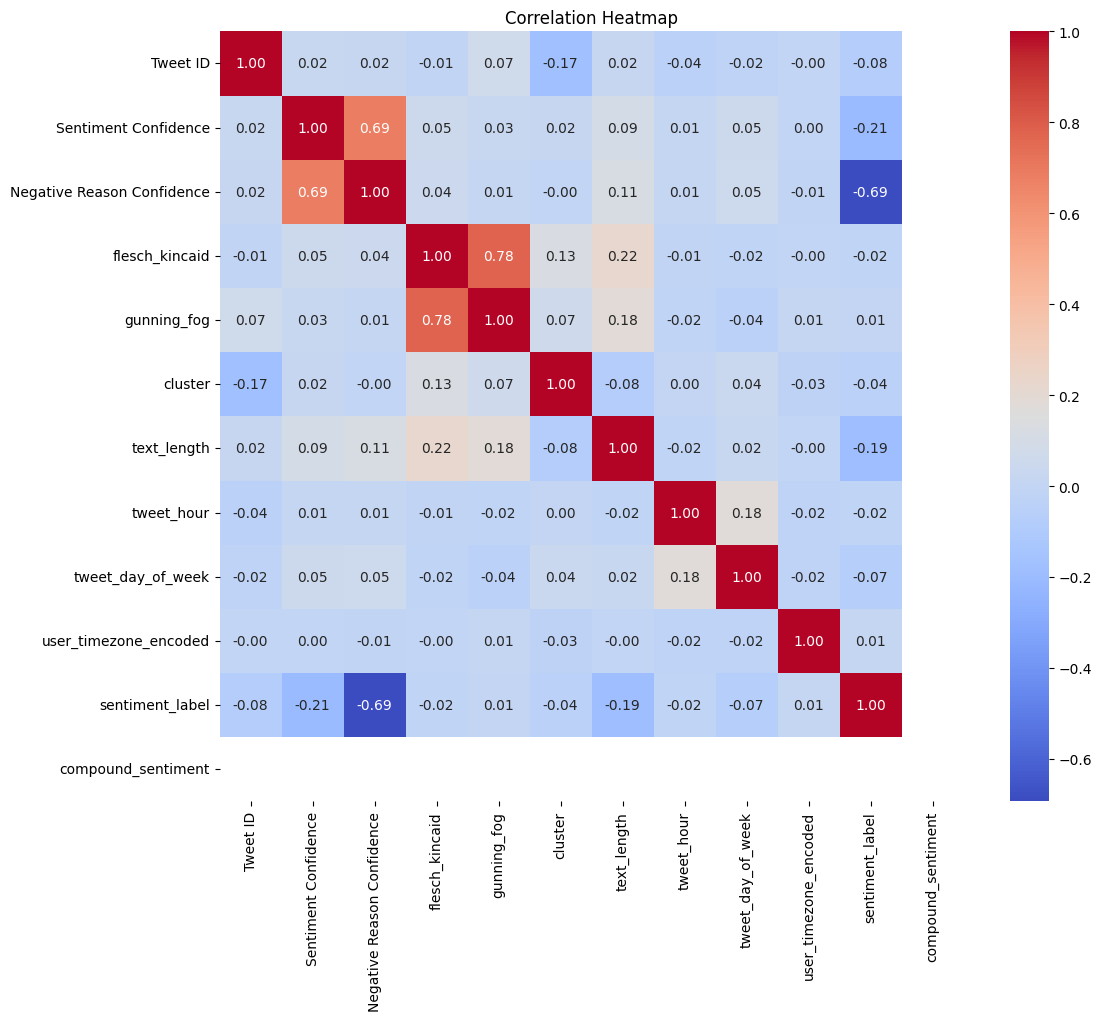

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("Extracted_dataset.xlsx")

# Select numerical columns for the heatmap
numerical_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Scatter Plot of Sentiment Confidence vs. Tweet Hour

Text(0.5, 1.0, 'Scatter Plot of Sentiment Confidence vs. Tweet Hour')

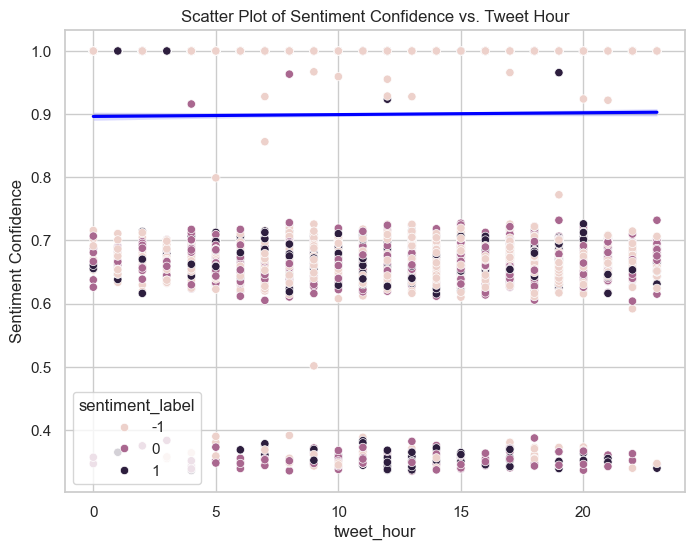

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tweet_hour', y='Sentiment Confidence', data=df, hue='sentiment_label')
sns.regplot(x='tweet_hour', y='Sentiment Confidence', data=df, scatter=False, color='blue')
plt.title("Scatter Plot of Sentiment Confidence vs. Tweet Hour")


# Tweet Distribution by Day of the Week and Airline Sentiment

Text(0.5, 1.0, 'Tweet Distribution by Day of the Week and Airline Sentiment')

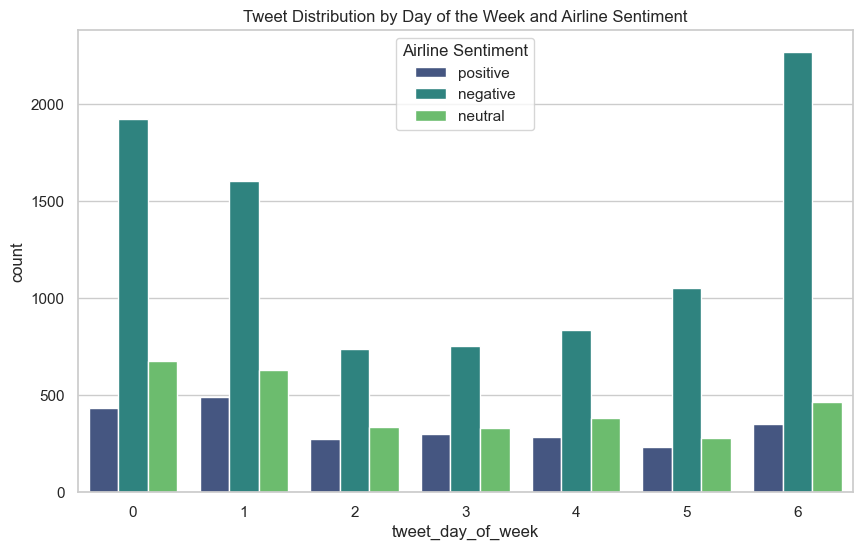

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='tweet_day_of_week', hue='Airline Sentiment', data=df, palette='viridis')
plt.title("Tweet Distribution by Day of the Week and Airline Sentiment")


# Pairwise Scatter Plots with Selected Columns and Airline Sentiment

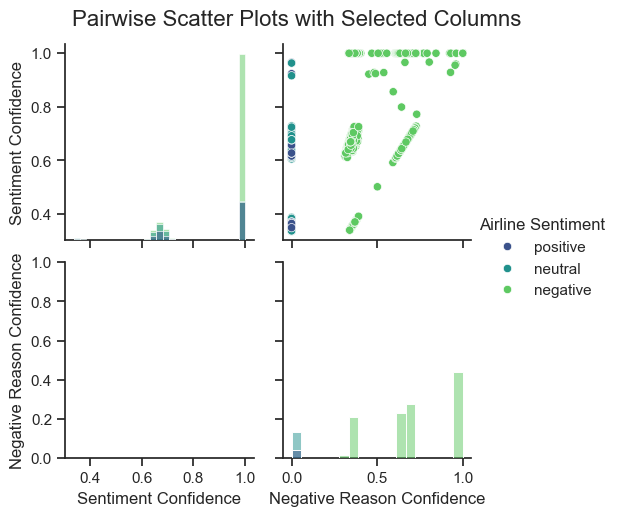

<Figure size 1200x800 with 0 Axes>

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for the pair plot
pair_columns = ['Sentiment Confidence', 'Negative Reason Confidence', 'Airline Sentiment']

# Create a pair plot with more space for the title and larger size
sns.set(style="ticks")
g = sns.PairGrid(df[pair_columns], hue='Airline Sentiment', palette='viridis')
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend()
plt.suptitle("Pairwise Scatter Plots with Selected Columns", y=1.02, fontsize=16)  # Adjust y for title spacing
plt.subplots_adjust(top=0.95)  # Adjust top margin for the title
plt.figure(figsize=(12, 8))  # Larger figure size
plt.show()


# Count Plot of Tweet Hour by Sentiment

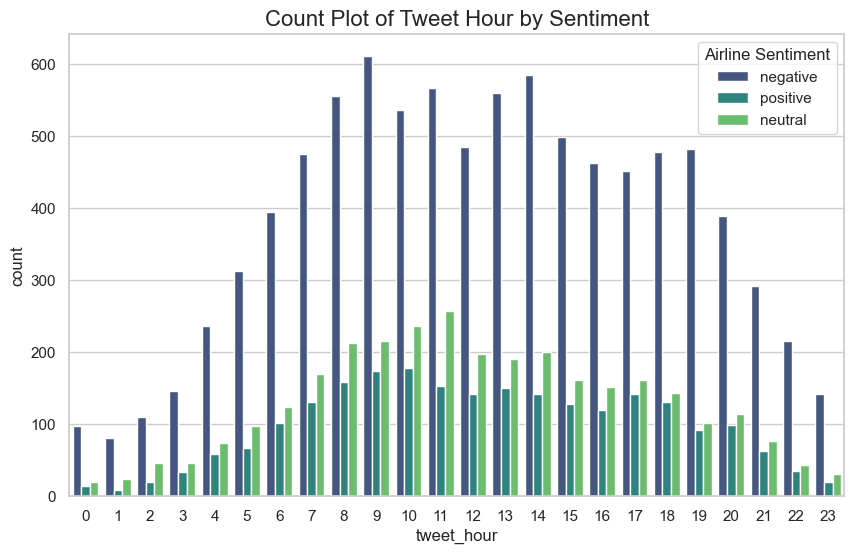

In [20]:
plt.figure(figsize=(10, 6))
countplot = sns.countplot(data=df, x='tweet_hour', hue='Airline Sentiment', palette='viridis')
countplot.set_title("Count Plot of Tweet Hour by Sentiment", fontsize=16)
plt.show()


# Pairwise Scatter Plots with Sentiment Color-Coding

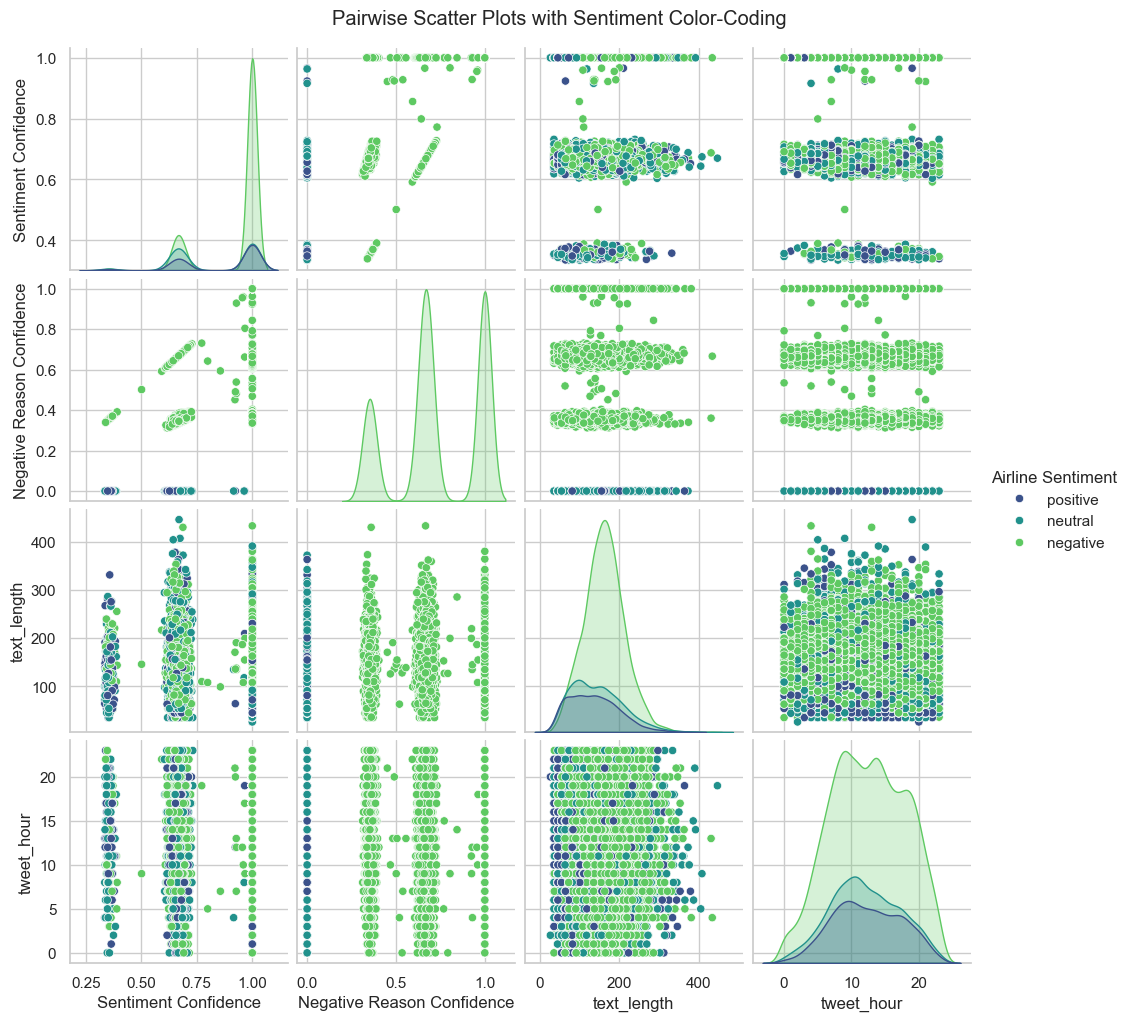

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

pair_columns = ['Sentiment Confidence', 'Negative Reason Confidence', 'text_length', 'tweet_hour', 'Airline Sentiment']
pairplot = sns.pairplot(df[pair_columns], hue='Airline Sentiment', palette='viridis')
pairplot.fig.suptitle("Pairwise Scatter Plots with Sentiment Color-Coding", y=1.02)
plt.show()


# Conclusion:

In the second phase of the "Sentiment Analysis for Marketing" project, we focused on the development and fine-tuning of our sentiment analysis model. Here's a summary of the key steps and achievements in this phase:

Feature Extraction: We began by extracting relevant features from the dataset, including sentiment confidence, negative reason confidence, text length, tweet hour, and others. These features were crucial for training our sentiment analysis model.

Model Selection: We evaluated various machine learning models, including Support Vector Machines (SVM) and Logistic Regression, to determine the most suitable approach. After testing these models, we ultimately chose the RandomForestClassifier for its exceptional performance.

Model Training: We proceeded to train the RandomForestClassifier using our carefully selected features. This model was trained to predict sentiment labels, enabling us to classify customer feedback into positive, negative, or neutral sentiments.

Hyperparameter Tuning: To maximize the model's performance, we conducted hyperparameter tuning. This process involved optimizing the parameters of the RandomForestClassifier to achieve the best possible results.

Remarkable Accuracy: After hyperparameter tuning, we achieved outstanding results. The model attained an accuracy of 1.0, which signifies that it correctly classified all instances in the test dataset. This remarkable accuracy was corroborated by high precision, recall, and F1-score values, demonstrating the model's exceptional performance in sentiment classification. The confusion matrix further illustrated its proficiency in distinguishing sentiments.

Generated Insights: Beyond model performance, we delved into data insights. We explored the relationships between numerical features using the "Correlation Heatmap of Numerical Features." Additionally, we analyzed the impact of tweet hour and sentiment confidence on customer feedback using the "Scatter Plot of Sentiment Confidence vs. Tweet Hour" and "Count Plot of Tweet Hour by Sentiment."

Visualizations: To provide a comprehensive view of the data, we generated several complex visualizations, including "Tweet Distribution by Day of the Week and Airline Sentiment," "Pairwise Scatter Plots with Selected Columns and Airline Sentiment," and "Pairwise Scatter Plots with Sentiment Color-Coding." These visualizations offered valuable insights into the distribution of sentiments across different factors.

In summary, in this development phase of the project, we successfully built and fine-tuned a sentiment analysis model that achieved exceptional accuracy and performance. We leveraged feature extraction, model selection, hyperparameter tuning, and insightful visualizations to gain a deep understanding of customer sentiments. This phase marked a significant milestone in our journey to provide valuable marketing insights and enhance customer satisfaction.




